In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:

train_dir = 'C:\\Users\\ysfah\\OneDrive\\Desktop\\NN\\PlantVillageSplits\\train'  
validation_dir = 'C:\\Users\\ysfah\\OneDrive\\Desktop\\NN\\PlantVillageSplits\\validation'  
test_dir = 'C:\\Users\\ysfah\\OneDrive\\Desktop\\NN\\PlantVillageSplits\\test'  


train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  
)

Found 16504 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


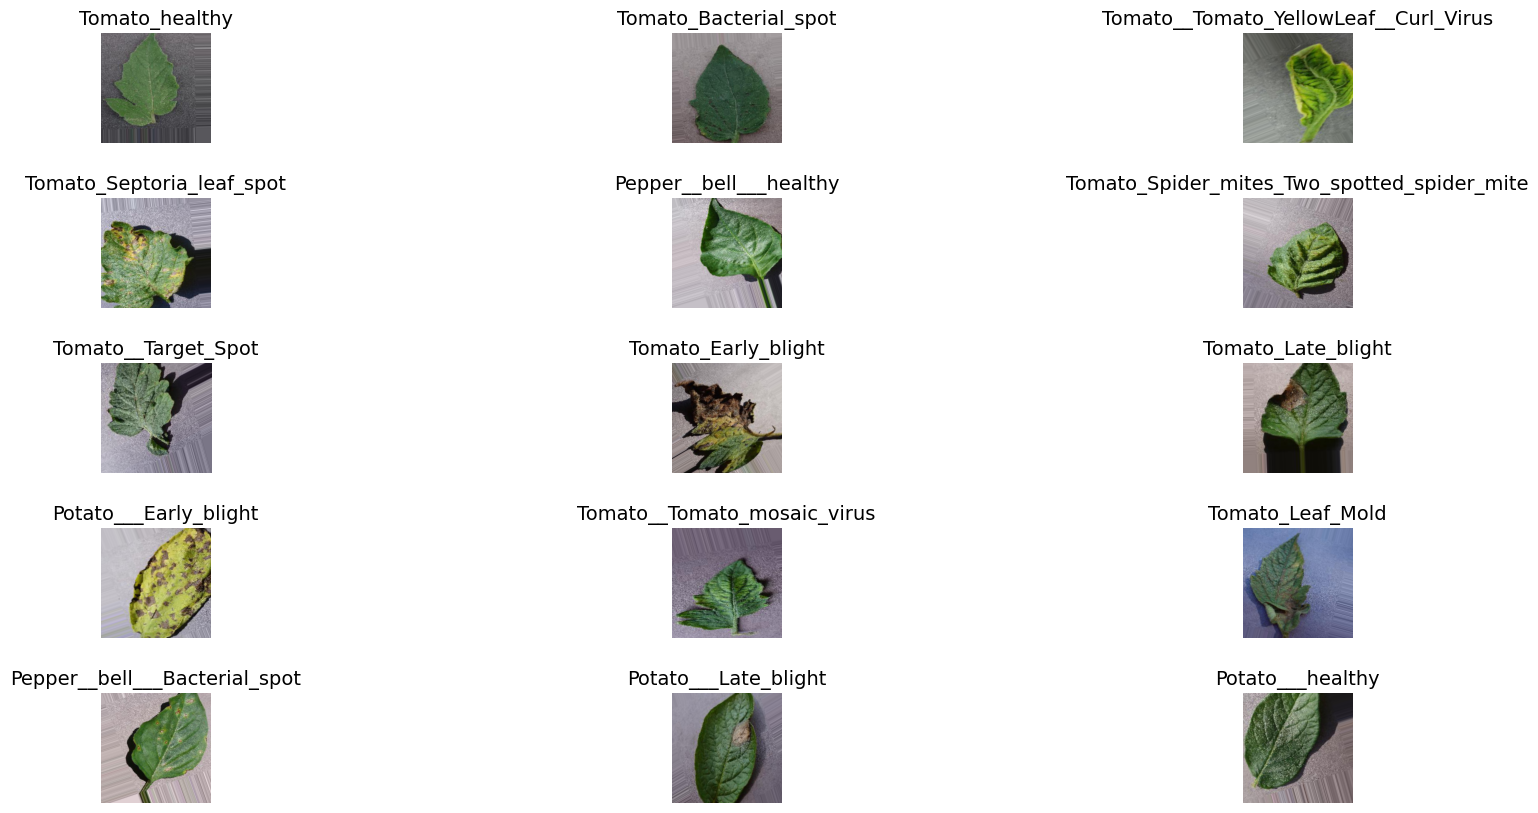

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve class indices and reverse the dictionary to get class names
class_names = {v: k for k, v in train_generator.class_indices.items()}

# Initialize a dictionary to store one image per class
images_per_class = {}

# Loop through the training generator
for images, labels in train_generator:
    for i, label in enumerate(labels):
        class_idx = np.argmax(label)
        if class_idx not in images_per_class:
            images_per_class[class_idx] = images[i]
        # Stop if we have one image for each class
        if len(images_per_class) == len(class_names):
            break
    if len(images_per_class) == len(class_names):
        break

# Determine the layout: 3 images per row
images_per_row = 3
total_classes = len(images_per_class)
rows = (total_classes + images_per_row - 1) // images_per_row  # Calculate rows

# Plot the images
plt.figure(figsize=(20, 10))  # Adjust figure size for larger images
for idx, (class_idx, image) in enumerate(images_per_class.items()):
    plt.subplot(rows, images_per_row, idx + 1)
    plt.imshow(image)
    plt.title(class_names[class_idx], fontsize=14)
    plt.axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.5)  # Increase spacing for clarity
plt.show()
